
# Credit EDA Assignment

<hr>

This assignment aims to find useful insights from a banking data which in turn can help banks to take better decisions to reduce the risk of money loss. 
The EDA assignment below will explore two datasets, 'applications data' and 'previous data'. The application data has the details of all the loan applicants with their latest loan applications, and also has seggregation based on defulters and non-defaulters. The previous data has the details of all the applicants who have previously applied for loan with the bank. 

In [1]:
#loading the libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the datasets

current_data = pd.read_csv('application_data.csv')
previous_data = pd.read_csv('previous_application.csv')

## Checking data structure
<ul>
    <li>Checking first five rows</li>
    <li>Checking data shape </li>
    <li>Describing the data </li>
    <li>Checking data types of all columns </li>
    </ul>

In [3]:
current_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#checking the number of rows and columns in the data 
current_data.shape

(307511, 122)

In [5]:
pd.set_option('display.max_rows', None)
current_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [6]:
current_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
current_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


## Handling missing values

<p>Handling missing values in any data is the major step in data cleaning process. </p>

In [8]:
#handling missing values
#checking the percentage of missing values in each column

check_missing  = (current_data.isnull().sum() /307511)*100
print(check_missing)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [9]:
#as we can see that maximum columns have greater than 45% missing values, and imputing these many values may diverte the data,
#therefore dropping them would be the best solution

In [9]:
drop_columns = check_missing[check_missing>45].index.to_list()

In [10]:
#dropping the columns
current_data.drop(drop_columns, axis  = 1, inplace=True)

In [11]:
current_data.shape

(307511, 73)

In [12]:
current_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
(current_data.isnull().sum()/len(current_data))*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [15]:
#occupation type column has almost 31% missing values and imputing them with mode will not make any sense because we cannot
#impute somebody's occupation
#hence, creating a separate category named 'unknown' for missing data in this column is the best method

In [14]:
current_data.OCCUPATION_TYPE.fillna('Unknown', inplace = True)

In [15]:
current_data.OCCUPATION_TYPE.isnull().sum()

0

In [16]:
#imputing missing values for AMT_GOODS_PRICE column
current_data.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

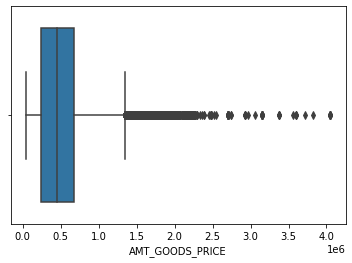

In [17]:
sns.boxplot(current_data.AMT_GOODS_PRICE)
plt.show()

In [18]:
#since the column is having many outliers, hence imputing with median will be a better approach
current_data.AMT_GOODS_PRICE.fillna(current_data.AMT_GOODS_PRICE.median(), inplace = True)

In [19]:
current_data.AMT_GOODS_PRICE.isnull().sum()

0

In [20]:
current_data.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

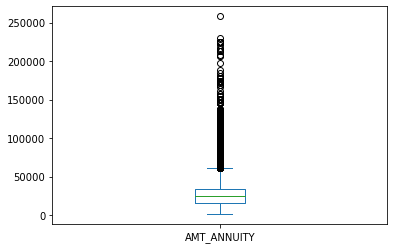

In [21]:
current_data.AMT_ANNUITY.plot.box()
plt.show()

In [22]:
#since the column is having many outliers, hence imputing with median will be a better approach
current_data.AMT_ANNUITY.fillna(current_data.AMT_ANNUITY.median(), inplace = True)

In [23]:
current_data.AMT_ANNUITY.isnull().sum()

0

In [24]:
#checking for categorical variable and replacing the null with the mode.
current_data.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

In [25]:
current_data.NAME_TYPE_SUITE.fillna('Unaccompanied', inplace = True)

In [26]:
current_data.NAME_TYPE_SUITE.isnull().sum()

0

In [27]:
current_data.DAYS_LAST_PHONE_CHANGE.describe()

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [28]:
current_data.DAYS_LAST_PHONE_CHANGE.isnull().sum()

1

In [29]:
current_data.CODE_GENDER.isnull().sum()

0

In [30]:
current_data.CNT_FAM_MEMBERS.describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

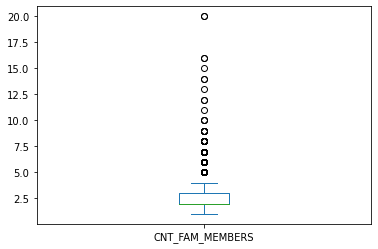

In [31]:
current_data.CNT_FAM_MEMBERS.plot.box()
plt.show()

In [32]:
#There is not much difference between the mean and median, we can impute with any. 
#Imputing by median
current_data.CNT_FAM_MEMBERS.fillna(current_data.CNT_FAM_MEMBERS.median(), inplace = True)

In [33]:
current_data.CNT_FAM_MEMBERS.isnull().sum()

0

In [34]:
#Dropping unnecessary columns
current_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [35]:
no_use_cols = ['REGION_POPULATION_RELATIVE','FLAG_EMP_PHONE','FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [36]:
current_data.drop(no_use_cols, axis = 1, inplace = True)

In [37]:
current_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_DAY'],
      dtype='object')

## Checking Invalid Entries in Columns

In [38]:
current_data.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [39]:
current_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [40]:
current_data.CODE_GENDER.replace('XNA', 'F',inplace = True)

In [41]:
current_data.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [42]:
current_data.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [43]:
current_data.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [44]:
current_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [45]:
current_data.NAME_INCOME_TYPE.value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [46]:
current_data.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [47]:
current_data.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [48]:
current_data.NAME_HOUSING_TYPE.value_counts()

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [49]:
current_data.FLAG_MOBIL.value_counts()

1    307510
0         1
Name: FLAG_MOBIL, dtype: int64

In [50]:
current_data.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [51]:
current_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [52]:
current_data.ORGANIZATION_TYPE.replace('XNA', 'Unknown', inplace = True)

In [53]:
current_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Unknown                   55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

## Checking data types of numeric columns

In [54]:
current_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                float64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGI

In [55]:
#Let's convert CNT_FAM_MEMBERS into integer type because number of family members can never be in decimals.
current_data['CNT_FAM_MEMBERS'] = current_data['CNT_FAM_MEMBERS'].astype('int')

In [56]:
#Let's convert the DAYS_BIRTH and DAYS_EMPLOYED column into year form by dividing each entry by 365
current_data.DAYS_BIRTH = current_data.DAYS_BIRTH.apply(lambda x: x/365)
current_data.DAYS_EMPLOYED = current_data.DAYS_EMPLOYED.apply(lambda x: x/365)

In [57]:
current_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Laborers,1,0,0,0,Business Entity Type 3,0.262949,0.139376,-1134.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Core staff,2,0,0,0,School,0.622246,NaN,-828.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Laborers,1,0,0,0,Government,0.555912,0.729567,-815.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Laborers,2,0,0,0,Business Entity Type 3,0.650442,NaN,-617.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Core staff,1,0,0,0,Religion,0.322738,NaN,-1106.0,0.0


In [58]:
cols_to_positive = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']
for col in cols_to_positive:
    current_data[col] = abs(current_data[col])

In [59]:
current_data.rename(columns = {'DAYS_BIRTH' : 'CNT_AGE', 'DAYS_EMPLOYED' : 'CNT_YEAR_EMPLOYED'}, inplace = True)

## Checking for outliers

In [60]:
pd.set_option('display.max_columns', None)
current_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,3648.0,2120,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,1186.0,291,1,Core staff,2,0,0,0,School,0.622246,NaN,828.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,4260.0,2531,1,Laborers,1,0,0,0,Government,0.555912,0.729567,815.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,9833.0,2437,1,Laborers,2,0,0,0,Business Entity Type 3,0.650442,NaN,617.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,4311.0,3458,1,Core staff,1,0,0,0,Religion,0.322738,NaN,1106.0,0.0


In [61]:
current_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05
mean,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05
std,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06


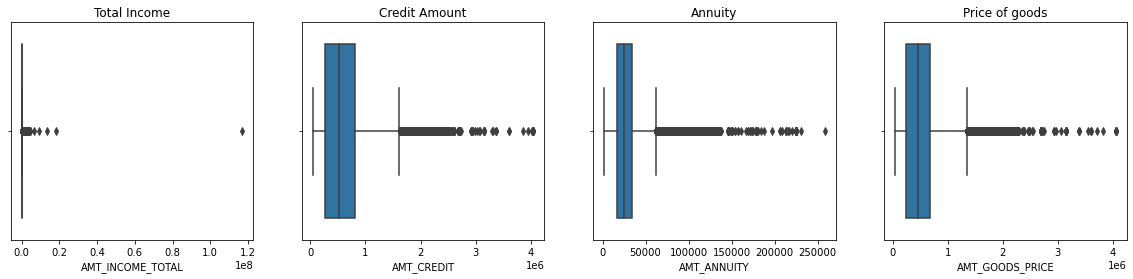

In [62]:
plt.figure(figsize = (20,4))

plt.subplot(1,4,1)
plt.title('Total Income')
sns.boxplot(current_data.AMT_INCOME_TOTAL)

plt.subplot(1,4,2)
plt.title('Credit Amount')
sns.boxplot(current_data.AMT_CREDIT)

plt.subplot(1,4,3)
plt.title('Annuity')
sns.boxplot(current_data.AMT_ANNUITY)

plt.subplot(1,4,4)
plt.title('Price of goods')
sns.boxplot(current_data.AMT_GOODS_PRICE)

plt.show()


In [63]:
current_data[['CNT_AGE', 'CNT_YEAR_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION']].describe()

,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,2994.202373,4986.120328
std,11.956133,382.037676,1509.450419,3522.886321
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,1720.000000,2010.000000
50%,43.150685,6.079452,3254.000000,4504.000000
75%,53.923288,15.635616,4299.000000,7479.500000
max,69.120548,1000.665753,7197.000000,24672.000000


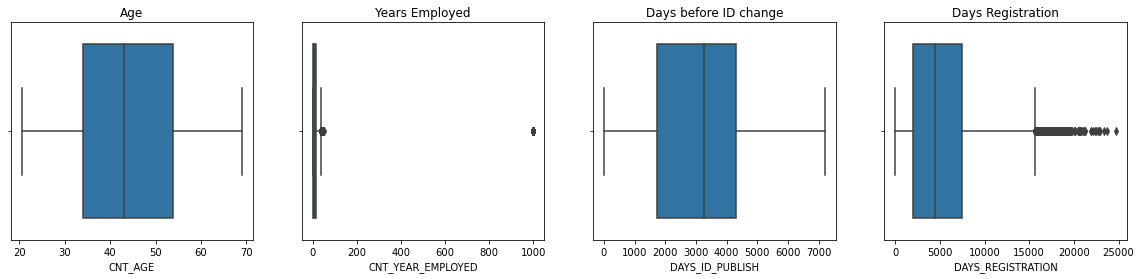

In [64]:
plt.figure(figsize = (20,4))

plt.subplot(1,4,1)
plt.title('Age')
sns.boxplot(current_data.CNT_AGE)

plt.subplot(1,4,2)
plt.title('Years Employed')
sns.boxplot(current_data.CNT_YEAR_EMPLOYED)

plt.subplot(1,4,3)
plt.title('Days before ID change')
sns.boxplot(current_data.DAYS_ID_PUBLISH)

plt.subplot(1,4,4)
plt.title('Days Registration')
sns.boxplot(current_data.DAYS_REGISTRATION)

plt.show()

In [65]:
current_data[['CNT_FAM_MEMBERS', 'CNT_CHILDREN']].describe()

,CNT_FAM_MEMBERS,CNT_CHILDREN
count,307511.000000,307511.000000
mean,2.152664,0.417052
std,0.910679,0.722121
min,1.000000,0.000000
25%,2.000000,0.000000
50%,2.000000,0.000000
75%,3.000000,1.000000
max,20.000000,19.000000


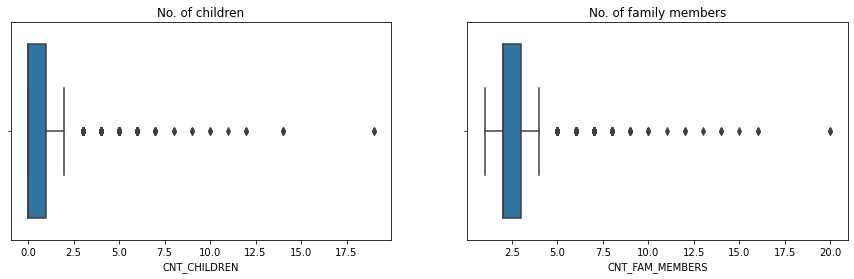

In [66]:
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
plt.title('No. of children')
sns.boxplot(current_data.CNT_CHILDREN)

plt.subplot(1,2,2)
plt.title('No. of family members')
sns.boxplot(current_data.CNT_FAM_MEMBERS)

plt.show()

### Treatment of outliers

There are three ways for outlier treatment:
    <ol>
    <li>Delete the records </li>
    <li> Capping/Flooring </li>
    <li> Imputing with median/mode </li>
    </ol>
    
The interquartile range is compared with the max and min values, if there is a huge gap, the imputing is done with capping or flooring. In our case, the imputations are done by capping.

In [67]:
#treatment for AMT_GOODS_PRICE column
Q3 = current_data.AMT_GOODS_PRICE.quantile(0.75)
Q1 = current_data.AMT_GOODS_PRICE.quantile(0.25)
IQR = Q3-Q1

upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(IQR, upper_bound, lower_bound)

441000.0 1341000.0 -423000.0


In [68]:
current_data.AMT_GOODS_PRICE = np.where(current_data.AMT_GOODS_PRICE> upper_bound, upper_bound, current_data.AMT_GOODS_PRICE)

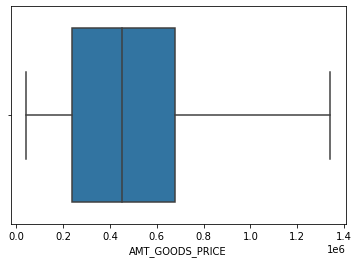

In [69]:
sns.boxplot(current_data.AMT_GOODS_PRICE)
plt.show()

In [70]:
#treatment for AMT_ANNUITY column
Q3 = current_data.AMT_ANNUITY.quantile(0.75)
Q1 = current_data.AMT_ANNUITY.quantile(0.25)
IQR = Q3-Q1

upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(IQR, upper_bound, lower_bound)

18072.0 61704.0 -10584.0


In [71]:
current_data.AMT_ANNUITY = np.where(current_data.AMT_ANNUITY> upper_bound, upper_bound, current_data.AMT_ANNUITY)

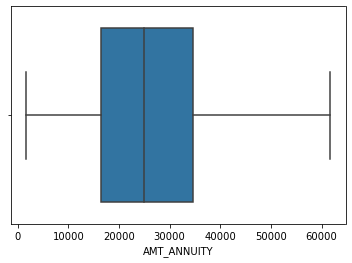

In [72]:
sns.boxplot(current_data.AMT_ANNUITY)
plt.show()

In [73]:
#treatment for AMT_CREDIT column
Q3 = current_data.AMT_CREDIT.quantile(0.75)
Q1 = current_data.AMT_CREDIT.quantile(0.25)
IQR = Q3-Q1

upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(IQR, upper_bound, lower_bound)

538650.0 1616625.0 -537975.0


In [74]:
current_data.AMT_CREDIT = np.where(current_data.AMT_CREDIT> upper_bound, upper_bound, current_data.AMT_CREDIT)

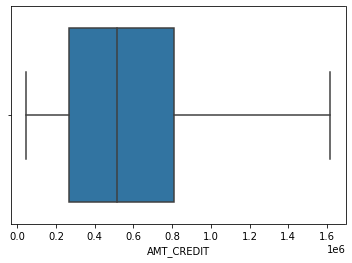

In [75]:
sns.boxplot(current_data.AMT_CREDIT)
plt.show()

In [76]:
#treatment for AMT_INCOME_TOTAL column
Q3 = current_data.AMT_INCOME_TOTAL.quantile(0.75)
Q1 = current_data.AMT_INCOME_TOTAL.quantile(0.25)
IQR = Q3-Q1

upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(IQR, upper_bound, lower_bound)

90000.0 337500.0 -22500.0


In [77]:
current_data.AMT_INCOME_TOTAL = np.where(current_data.AMT_INCOME_TOTAL> upper_bound, upper_bound, current_data.AMT_INCOME_TOTAL)

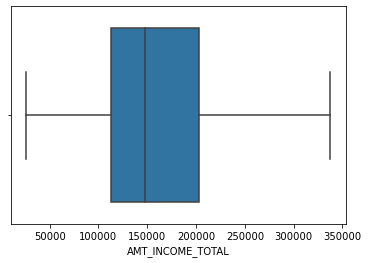

In [78]:
sns.boxplot(current_data.AMT_INCOME_TOTAL)
plt.show()

In [79]:
#treatment for CNT_CHILDREN column
Q3 = current_data.CNT_CHILDREN.quantile(0.75)
Q1 = current_data.CNT_CHILDREN.quantile(0.25)
IQR = Q3-Q1

upper_bound = Q3+1.5*IQR
lower_bound = Q1-1.5*IQR
print(IQR, upper_bound, lower_bound)

1.0 2.5 -1.5


In [80]:
current_data.CNT_CHILDREN = np.where(current_data.CNT_CHILDREN> upper_bound, upper_bound, current_data.CNT_CHILDREN)

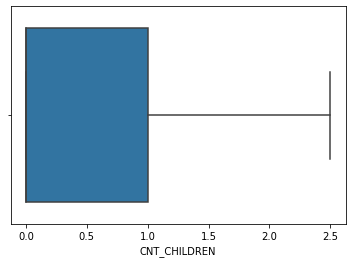

In [81]:
sns.boxplot(current_data.CNT_CHILDREN)
plt.show()

## Binning of continuous variables

In [82]:
#Lets check head() again
current_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,3648.0,2120,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,1186.0,291,1,Core staff,2,0,0,0,School,0.622246,NaN,828.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,4260.0,2531,1,Laborers,1,0,0,0,Government,0.555912,0.729567,815.0,0.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,52.068493,8.326027,9833.0,2437,1,Laborers,2,0,0,0,Business Entity Type 3,0.650442,NaN,617.0,NaN
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,54.608219,8.323288,4311.0,3458,1,Core staff,1,0,0,0,Religion,0.322738,NaN,1106.0,0.0


In [83]:
#binning of CNT_AGE variable

current_data['AGE_GROUP'] = pd.cut(current_data.CNT_AGE, bins = [20,30,40,50,60,70], labels = ['<30', '30-40', '40-50', '50-60', '>60'])

In [84]:
#binning of AMT_INCOME_TOTAL variable
current_data['INCOME_GROUP'] = pd.cut(current_data.AMT_INCOME_TOTAL, bins = 5, labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High'])

## Analysis

### Imbalance percentage

0    0.919271
1    0.080729
Name: TARGET, dtype: float64


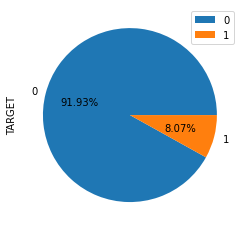

In [85]:
print(current_data.TARGET.value_counts(normalize = True))
current_data.TARGET.value_counts(normalize = True).plot.pie(autopct='%.2f%%')
plt.legend()
plt.show()

## Analysis on data

<p> We will first divide the data into parts, Defaulters and Non-defaulters and will then perform Univariate, Bivariate and Multi-variate analysis parallely </p>

In [86]:
defaulters = current_data[current_data.TARGET == 1]
non_defaulters =  current_data[current_data.TARGET == 0]

In [87]:
print(defaulters.shape)
print(non_defaulters.shape)

(24825, 33)
(282686, 33)


In [88]:
defaulters.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,3648.0,2120,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.0,<30,Normal
26,100031,1,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,51.298630,7.200000,6573.0,1827,1,Cooking staff,1,0,0,0,Business Entity Type 3,0.548477,0.190706,161.0,0.0,50-60,Low
40,100047,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,47.895890,3.457534,1182.0,1029,1,Laborers,2,0,0,0,Business Entity Type 3,0.306841,0.320163,1075.0,0.0,40-50,Normal
42,100049,1,Cash loans,F,N,N,0.0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,36.668493,9.854795,45.0,4409,1,Sales staff,2,0,0,0,Self-employed,0.674203,0.399676,1480.0,0.0,30-40,Low
81,100096,1,Cash loans,F,N,Y,0.0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,67.928767,1000.665753,5391.0,4199,1,Unknown,2,0,0,0,Unknown,0.023952,0.720944,0.0,0.0,>60,Very Low


#### Univariate Analysis

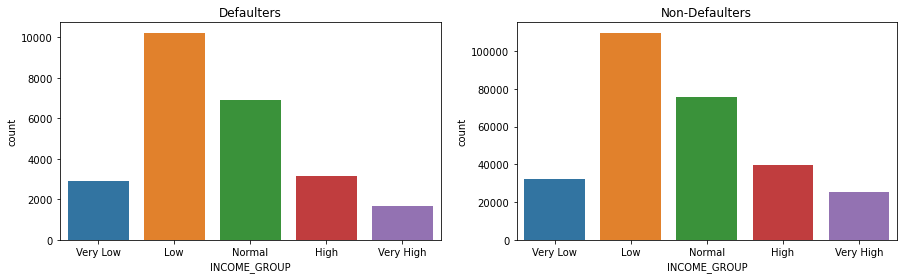

In [89]:
#INCOME_GROUP vs TARGET
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.countplot(defaulters.INCOME_GROUP)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.countplot(non_defaulters.INCOME_GROUP)
plt.title('Non-Defaulters')



plt.show()

From the above graphs it is clearly visible that people with low income tend to have highest number in defaulters as well as non-defaulters

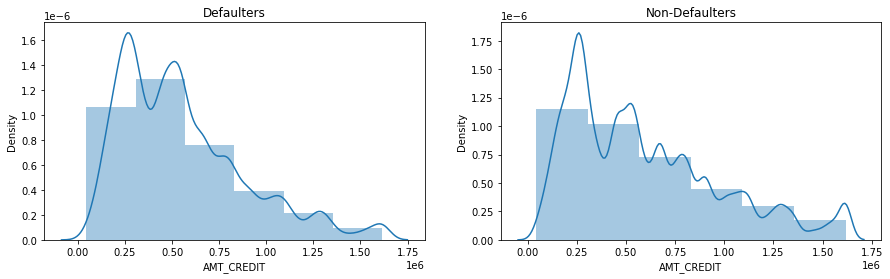

In [90]:
#AMT_CREDIT vs TARGET
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.distplot(defaulters.AMT_CREDIT, bins = 6)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.distplot(non_defaulters.AMT_CREDIT, bins = 6)
plt.title('Non-Defaulters')

plt.show()


Non-defaulters seems to follow a general trend where most people take a loan of around 3 lakhs and as the loan amount increases, number of people decreases because not all people take huge loans.
In defaulters most people seem to have taken a loan of 5 lakhs.

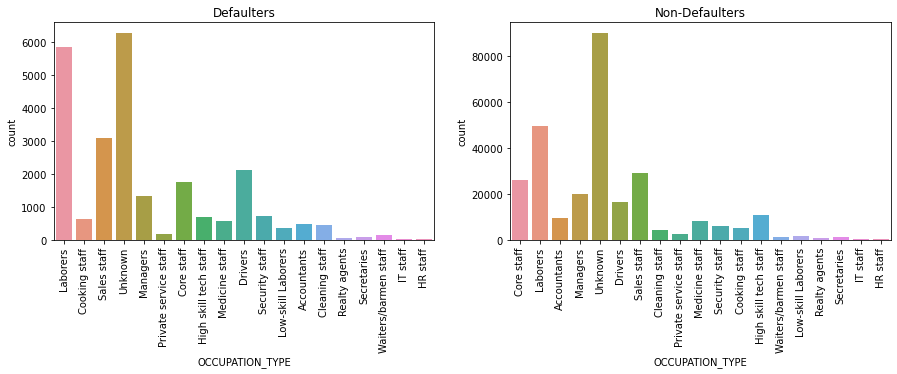

In [91]:
#OCCUPATION_TYPE vs TARGET
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.countplot(defaulters.OCCUPATION_TYPE)
plt.title('Defaulters')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(non_defaulters.OCCUPATION_TYPE)
plt.title('Non-Defaulters')
plt.xticks(rotation = 90)



plt.show()

Labourers seems to be maximum in Defaulters as well as non-defaulters.

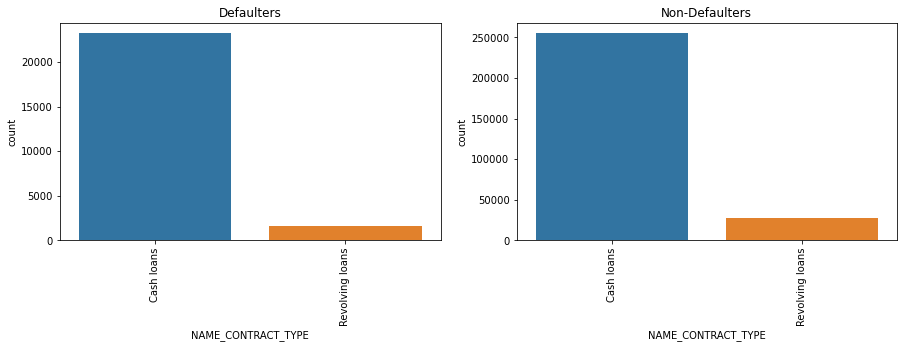

In [92]:
#NAME_CONTRACT_TYPE vs TARGET
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.countplot(defaulters.NAME_CONTRACT_TYPE)
plt.title('Defaulters')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(non_defaulters.NAME_CONTRACT_TYPE)
plt.title('Non-Defaulters')
plt.xticks(rotation = 90)



plt.show()

Maximum defaulters as well as non-defaulters have taken cash loans and a very small amount of people have taken revolving loans.

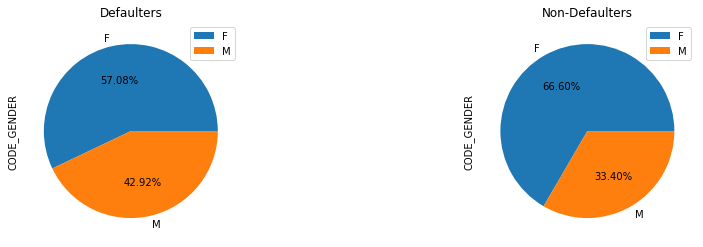

In [93]:
#CODE_GENDER vs TARGET
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
defaulters.CODE_GENDER.value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.title('Defaulters')
plt.legend()

plt.subplot(1,2,2)
non_defaulters.CODE_GENDER.value_counts().plot(kind= 'pie', autopct = '%.2f%%')
plt.title('Non-Defaulters')
plt.legend()



plt.show()

Females are maximum in both defaulters and non-defaulters

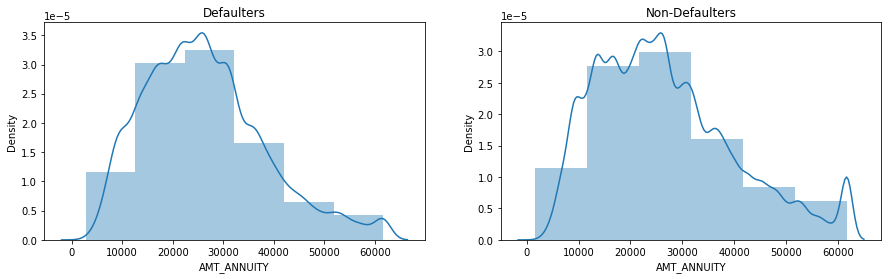

In [94]:
#AMT_ANNUITY vs TARGET
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.distplot(defaulters.AMT_ANNUITY, bins = 6)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.distplot(non_defaulters.AMT_ANNUITY, bins = 6)
plt.title('Non-Defaulters')

plt.show()

Almost similar trend is seen in both the cases.

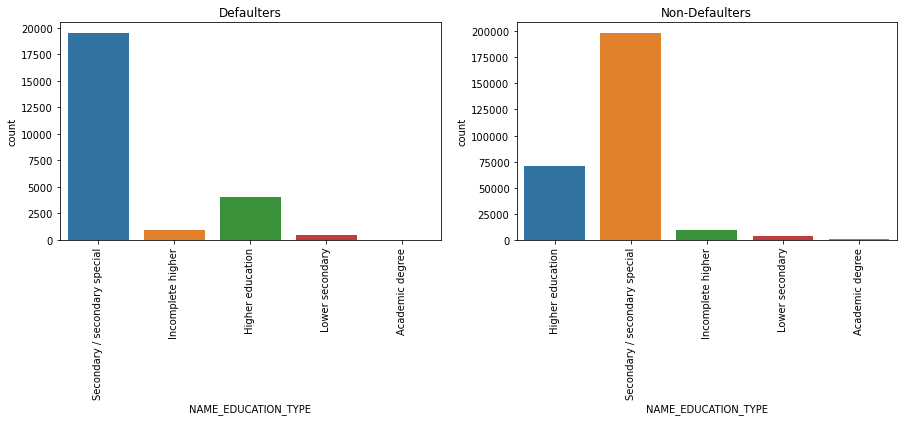

In [95]:
#NAME_EDUCATION_TYPE vs TARGET
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.countplot(defaulters.NAME_EDUCATION_TYPE)
plt.title('Defaulters')
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(non_defaulters.NAME_EDUCATION_TYPE)
plt.title('Non-Defaulters')
plt.xticks(rotation = 90)



plt.show()

People with secondary/secondary special education are maximum in number in both defaulters and non -defaulters, followed by people with higher education.

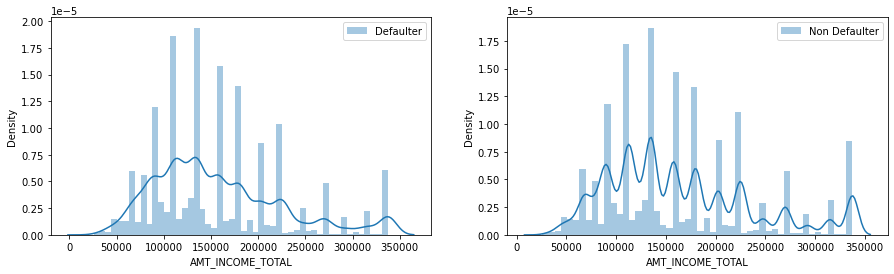

In [96]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(defaulters.AMT_INCOME_TOTAL,label='Defaulter')
plt.legend()

plt.subplot(1,2,2)
sns.distplot(non_defaulters.AMT_INCOME_TOTAL,label='Non Defaulter')

plt.legend()
plt.show()

<ol>
    <li>
In defaulters, people with the income between 1L-1.5L are more in number than people with the income beyond 2.5L. This depicts that higher income people are still less defaulting as compared to lower income people. </li>
    <li>
        In non-defaulters we can see a normal high-low trend. </li>
    </ol>

### Bivariate Analysis

In [171]:
#Correlation matrix- finding top 10 highest correlated variables
num_col0=non_defaulters.select_dtypes('number')
corr_mat0=num_col0.corr(method='pearson')
corr_mat0=corr_mat0.unstack().sort_values(ascending=False).drop_duplicates()
corr_mat0.head(11)

SK_ID_CURR                   SK_ID_CURR                    1.000000
AMT_CREDIT                   AMT_GOODS_PRICE               0.985582
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.870962
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.861861
AMT_ANNUITY                  AMT_GOODS_PRICE               0.797315
                             AMT_CREDIT                    0.794808
CNT_YEAR_EMPLOYED            CNT_AGE                       0.626114
AMT_ANNUITY                  AMT_INCOME_TOTAL              0.492921
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_LIVE_REGION    0.446101
AMT_INCOME_TOTAL             AMT_GOODS_PRICE               0.417592
AMT_CREDIT                   AMT_INCOME_TOTAL              0.414309
dtype: float64

In [172]:
num_col1=defaulters.select_dtypes('number')
corr_mat1=num_col1.corr(method='pearson')
corr_mat1=corr_mat1.unstack().sort_values(ascending=False).drop_duplicates()
corr_mat1.head(11)

SK_ID_CURR                   SK_ID_CURR                    1.000000
AMT_CREDIT                   AMT_GOODS_PRICE               0.981837
CNT_FAM_MEMBERS              CNT_CHILDREN                  0.875289
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION    0.847885
AMT_GOODS_PRICE              AMT_ANNUITY                   0.760287
AMT_ANNUITY                  AMT_CREDIT                    0.760123
CNT_AGE                      CNT_YEAR_EMPLOYED             0.582185
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_WORK_REGION    0.497937
AMT_ANNUITY                  AMT_INCOME_TOTAL              0.436918
AMT_GOODS_PRICE              AMT_INCOME_TOTAL              0.357696
AMT_INCOME_TOTAL             AMT_CREDIT                    0.356199
dtype: float64

Correlation for defaulters is  0.9818366038380503
Correlation for non-defaulters is  0.9855821500980368


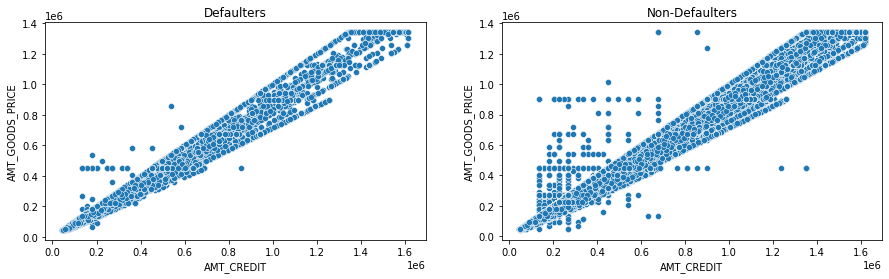

In [98]:
#AMT_CREDIT vs AMT_GOODS_PRICE
print('Correlation for defaulters is ', defaulters.AMT_CREDIT.corr(defaulters.AMT_GOODS_PRICE))
print('Correlation for non-defaulters is ', non_defaulters.AMT_CREDIT.corr(non_defaulters.AMT_GOODS_PRICE))

plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.scatterplot(defaulters.AMT_CREDIT, defaulters.AMT_GOODS_PRICE)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.scatterplot(non_defaulters.AMT_CREDIT, non_defaulters.AMT_GOODS_PRICE)
plt.title('Non-Defaulters')

plt.show()

From the above plot it can be seen that credit amount is highly correlated with the price of goods in both defaulters and non-defaulters. This is also verified by the value of correlation coefficient which is 0.98. This seems to be fairly true that more the price of goods more is the amount of loan which is taken.

Correlation for defaulters is  0.7601234136216812
Correlation for non-defaulters is  0.7948078743243145


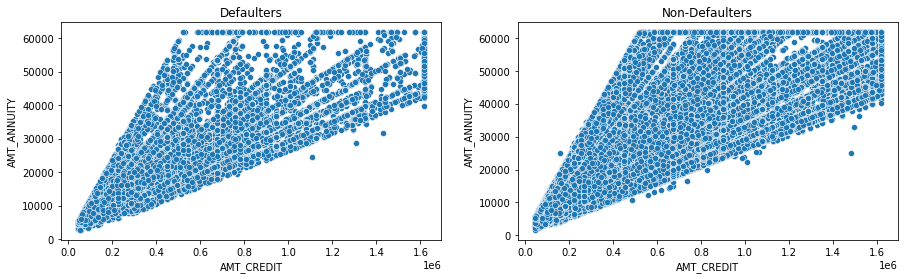

In [99]:
#AMT_CREDIT vs AMT_ANNUITY
print('Correlation for defaulters is ', defaulters.AMT_CREDIT.corr(defaulters.AMT_ANNUITY))
print('Correlation for non-defaulters is ', non_defaulters.AMT_CREDIT.corr(non_defaulters.AMT_ANNUITY))

plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.scatterplot(defaulters.AMT_CREDIT, defaulters.AMT_ANNUITY)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.scatterplot(non_defaulters.AMT_CREDIT, non_defaulters.AMT_ANNUITY)
plt.title('Non-Defaulters')

plt.show()

There seems to be a normal correlation between the annuity amount and credit amount. 

Correlation =  0.7602866472620412


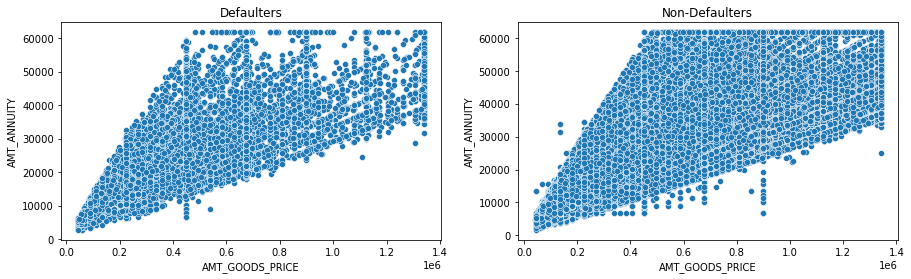

In [100]:
#AMT_GOODS_PRICE vs AMT_ANNUITY
print('Correlation = ', defaulters.AMT_GOODS_PRICE.corr(defaulters.AMT_ANNUITY))

plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.scatterplot(defaulters.AMT_GOODS_PRICE, defaulters.AMT_ANNUITY)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.scatterplot(non_defaulters.AMT_GOODS_PRICE, non_defaulters.AMT_ANNUITY)
plt.title('Non-Defaulters')

plt.show()

There seems to be a normal correlation between price of goods and the amount of annuity but the causation between the two is not guaranteed.

Correlation for defaulters is  0.356198773589607
Correlation for non-defaulters is  0.41430852924965916


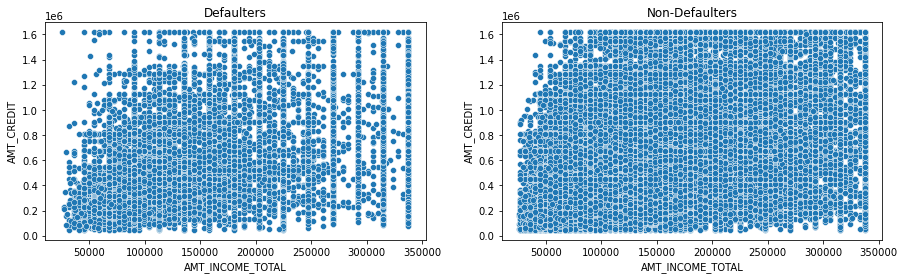

In [101]:
#AMT_CREDIT vs AMT_INCOME_TOTAL
print('Correlation for defaulters is ', defaulters.AMT_INCOME_TOTAL.corr(defaulters.AMT_CREDIT))
print('Correlation for non-defaulters is ', non_defaulters.AMT_INCOME_TOTAL.corr(non_defaulters.AMT_CREDIT))

plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.scatterplot(defaulters.AMT_INCOME_TOTAL, defaulters.AMT_CREDIT)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.scatterplot(non_defaulters.AMT_INCOME_TOTAL, non_defaulters.AMT_CREDIT)
plt.title('Non-Defaulters')

plt.show()

The correlation between income of client and the amount of loan does not seems to have a very good correlation for defaulters and non-defaulters both. It is expected that people with higher income are able to take huge loan amount so that they can repay it easily but this is also true that people with low income also take huge amount loan to fulfill their luxurius needs. This can be seen from the defaulters graph that the points are not very dense where the loan amount and credit amount increases.

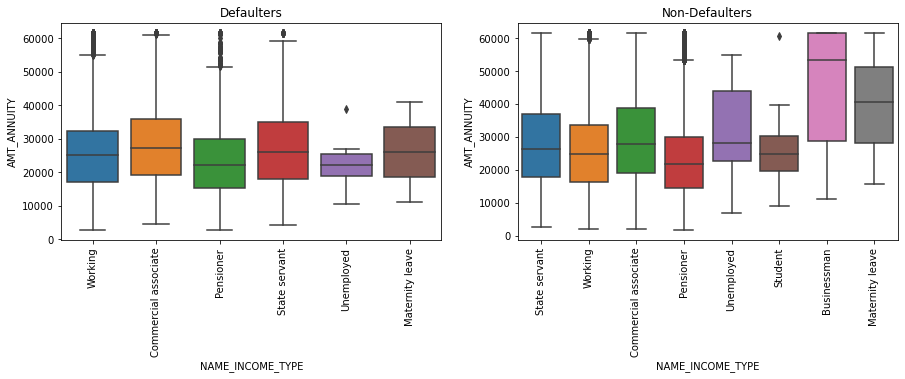

In [102]:
#AMT_ANNUITY vs NAME_INCOME_TYPE
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.boxplot(defaulters.NAME_INCOME_TYPE, defaulters.AMT_ANNUITY)
plt.xticks(rotation = 90)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.boxplot(non_defaulters.NAME_INCOME_TYPE, non_defaulters.AMT_ANNUITY)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters')

plt.show()

From the above plot it can be seen that:
<ol>
    <li>In the defaulters it can be seen that all people have median annuity amount between 20,000 - 30,000. Also there are no businessmen and students who possess an annuity amount in this category. </li>
    <li>In the non-defaulters businessmen have the highest median annuity amount followed by people on maternity leave.</li>


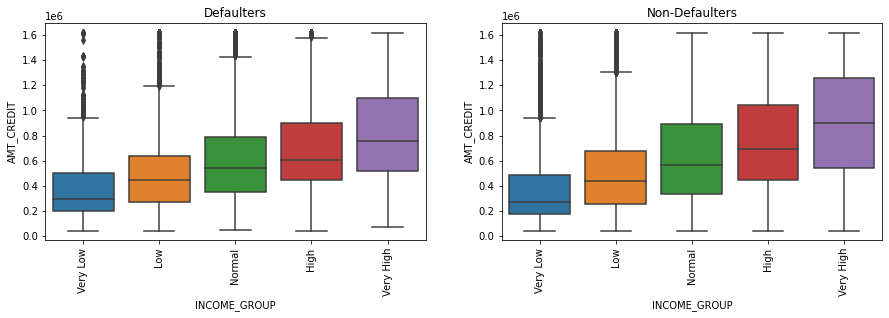

In [103]:
#AMT_CREDIT vs INCOME_GROUP
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.boxplot(defaulters.INCOME_GROUP, defaulters.AMT_CREDIT)
plt.xticks(rotation = 90)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.boxplot(non_defaulters.INCOME_GROUP, non_defaulters.AMT_CREDIT)
plt.xticks(rotation = 90)
plt.title('Non-Defaulters')

plt.show()

Almost similar trend is seen in both the graphs. In the defaulters rich people have taken a median loan amount of 7L whereas in non-defaulters the median loan amount for the rich section is almost 10L. This is quite evident as bank has build trust on non-defaulters and have given a credit. 

Also a normal trend is visible where as the income is increasing, the median amount of loan is also increasing.

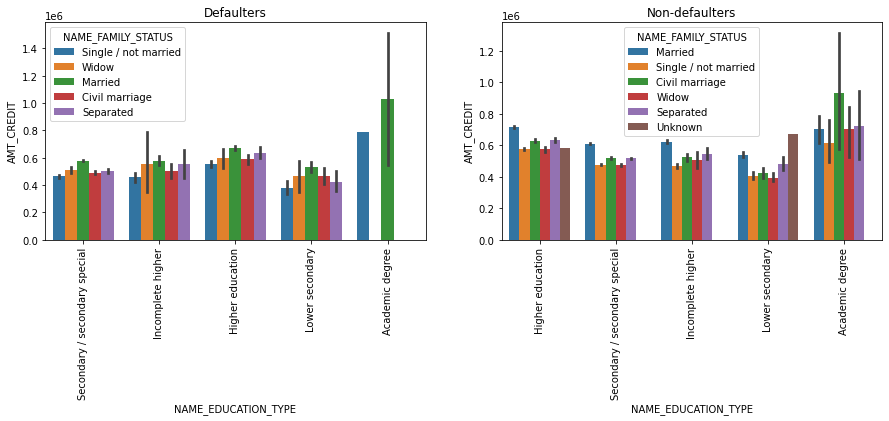

In [104]:
#NAME_EDUCATION_TYPE vs AMT_CREDIT vs NAME_FAMILY_STATUS
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.barplot(defaulters.NAME_EDUCATION_TYPE, defaulters.AMT_CREDIT, hue = defaulters.NAME_FAMILY_STATUS)
plt.xticks(rotation = 90)
plt.title('Defaulters')


plt.subplot(1,2,2)
sns.barplot(non_defaulters.NAME_EDUCATION_TYPE, non_defaulters.AMT_CREDIT, hue = non_defaulters.NAME_FAMILY_STATUS)
plt.xticks(rotation = 90)
plt.title('Non-defaulters')

plt.show()

<ol>
    <li>There are no widows, civil marriage people and separated people having an academic degree and have failed in repaying the loan. </li>
    <li>In the defaulters, all the married people having any education degree has taken maximum credit. Same goes with the non-defaulters except for people having Academic degree</li>
   </ol>

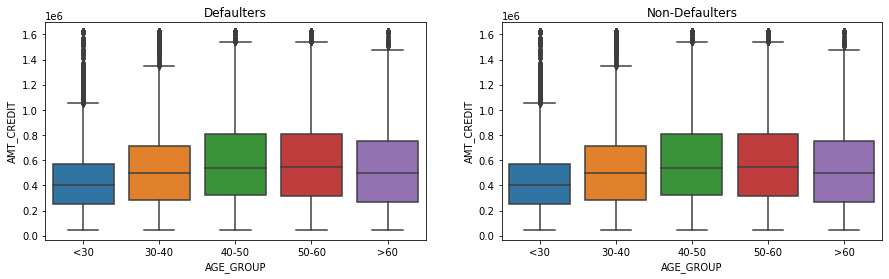

In [105]:
#AGE_GROUP vs AMT_CREDIT
plt.figure(figsize = (15,4))

plt.subplot(1,2,1)
sns.boxplot(defaulters.AGE_GROUP, defaulters.AMT_CREDIT)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.boxplot(defaulters.AGE_GROUP, defaulters.AMT_CREDIT)
plt.title('Non-Defaulters')

plt.show()

In both cases maximum credit is taken by the people in age group of 40-50, followed by people in the age group of 50-60. In defaulters people of age less than 30 years have low credit amount but still they are unable to pay the loan. This could be because these people still don't have stable jobs in hand.

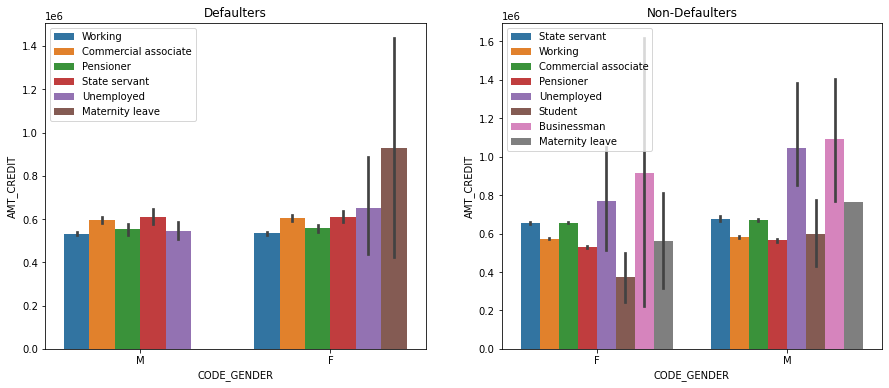

In [106]:
#CODE_GENDER vs AMT_CREDIT vs NAME_INCOME_TYPE
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Defaulters')
sns.barplot(defaulters.CODE_GENDER,defaulters.AMT_CREDIT,hue=defaulters.NAME_INCOME_TYPE)
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.title('Non-Defaulters')
sns.barplot(non_defaulters.CODE_GENDER,non_defaulters.AMT_CREDIT,hue=non_defaulters.NAME_INCOME_TYPE)
plt.legend(loc='upper left')

plt.show()

<ol>
    <li>Pregnant females tend to take high credit and fail in repaying whereas pregnant females who have taken low credit have repayed successfully. </li>
    <li>There are no students and businessmen who have failed to replay the loan </li>
    <li>An unusual trend can be seen where males and females who are unemployed have managed to repay the loan and have also taken huge credit </li>
    </ol>
    

## Multivariate analysis

In [107]:
defaulters.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AGE_GROUP,INCOME_GROUP
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,3648.0,2120,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.0,<30,Normal
26,100031,1,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,51.298630,7.200000,6573.0,1827,1,Cooking staff,1,0,0,0,Business Entity Type 3,0.548477,0.190706,161.0,0.0,50-60,Low
40,100047,1,Cash loans,M,N,Y,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,47.895890,3.457534,1182.0,1029,1,Laborers,2,0,0,0,Business Entity Type 3,0.306841,0.320163,1075.0,0.0,40-50,Normal
42,100049,1,Cash loans,F,N,N,0.0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,36.668493,9.854795,45.0,4409,1,Sales staff,2,0,0,0,Self-employed,0.674203,0.399676,1480.0,0.0,30-40,Low
81,100096,1,Cash loans,F,N,Y,0.0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,67.928767,1000.665753,5391.0,4199,1,Unknown,2,0,0,0,Unknown,0.023952,0.720944,0.0,0.0,>60,Very Low


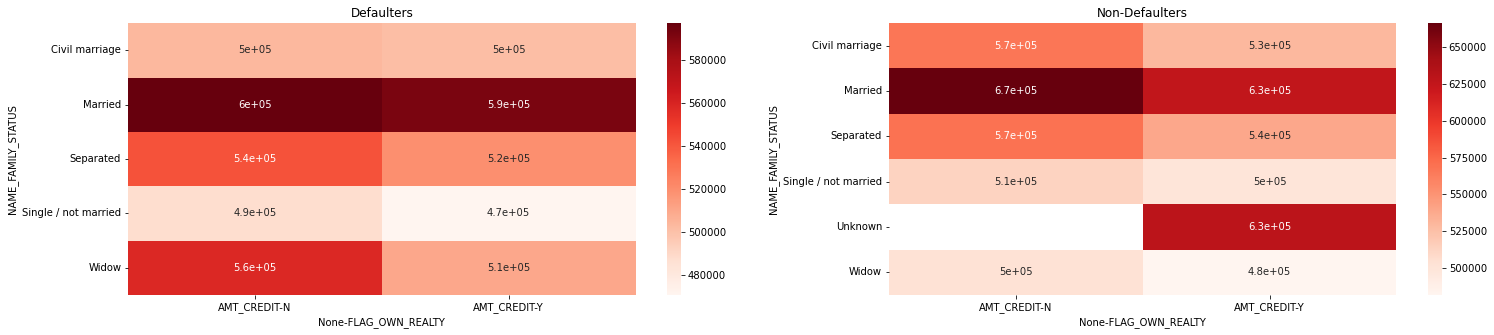

In [108]:
#NAME_FAMILY_STATUS vs FLAG_OWN_REALTY vs AMT_CREDIT
p1 = pd.pivot_table(defaulters, index =['NAME_FAMILY_STATUS'], columns = ['FLAG_OWN_REALTY'], values = ['AMT_CREDIT'])
p0 = pd.pivot_table(non_defaulters, index =['NAME_FAMILY_STATUS'], columns = ['FLAG_OWN_REALTY'], values = ['AMT_CREDIT'])

plt.figure(figsize = (25,5))

plt.subplot(1,2,1)
sns.heatmap(p1, annot = True , cmap = 'Reds')
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.heatmap(p0, annot = True , cmap = 'Reds')
plt.title('Non-Defaulters')

plt.show()

<ol>
    <li>Married people who does not have a realty tend to take huge loans. </li>
    <li>Widows who does not have realty have taken huge loan and hence are unable to repay but there are some widows who do not have realty but have repaid the loan amount. </li>
    <li>Civil marriage people who are defaulters are having same amount of credit which is less than those who are non-defaulters but are still unable to repay the loan. </li>
    </ol>
    

## Analysis on previous data

## Checking data structure
<ul>
    <li>Checking first five rows</li>
    <li>Checking data shape </li>
    <li>Describing the data </li>
    <li>Checking data types of all columns </li>
    </ul>

In [109]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
#checking the number of rows and columns in the data 
previous_data.shape

(1670214, 37)

In [111]:
pd.set_option('display.max_rows', None)
previous_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [112]:
previous_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


## Handling missing values

<p>Handling missing values in any data is the major step in data cleaning process. </p>

In [113]:
#handling missing values
#checking the percentage of missing values in each column

check_missing  = (previous_data.isnull().sum() /len(previous_data))*100
print(check_missing)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [114]:
drop_columns = check_missing[check_missing>45].index.to_list()

In [115]:
#dropping the columns
previous_data.drop(drop_columns, axis  = 1, inplace=True)

In [116]:
previous_data.shape

(1670214, 32)

In [117]:
previous_data.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
DAYS_FIRST_D

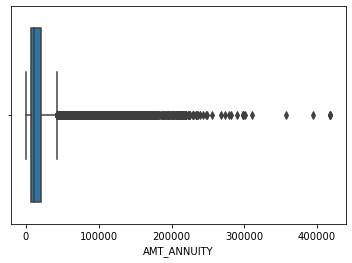

In [118]:
#imputing missing values for AMT_ANNUITY
sns.boxplot(previous_data.AMT_ANNUITY)
plt.show()

In [119]:
#since the column has many outliers hence imputing with median is the best method.
previous_data.AMT_ANNUITY.fillna(previous_data.AMT_ANNUITY.median(), inplace = True)

In [120]:
previous_data.AMT_ANNUITY.isnull().sum()

0

In [121]:
#imputing the AMT_CREDIT with median
previous_data.AMT_CREDIT.fillna(previous_data.AMT_CREDIT.median(), inplace = True)

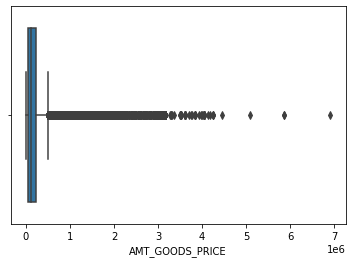

In [122]:
#imputing missing values for AMT_GOODS_PRICE
sns.boxplot(previous_data.AMT_GOODS_PRICE)
plt.show()

In [123]:
#since the column has many outliers hence imputing with median is the best method.
previous_data.AMT_GOODS_PRICE.fillna(previous_data.AMT_GOODS_PRICE.median(), inplace = True)

In [124]:
previous_data.AMT_GOODS_PRICE.isnull().sum()

0

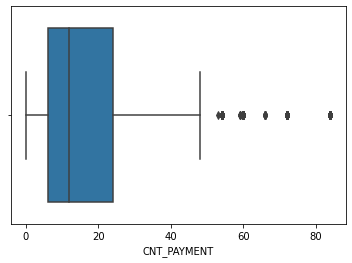

In [125]:
#imputing missing values for CNT_PAYMENT
sns.boxplot(previous_data.CNT_PAYMENT)
plt.show()

In [126]:
#since the column has outliers hence imputing with median is the best method.
previous_data.CNT_PAYMENT.fillna(previous_data.CNT_PAYMENT.median(), inplace = True)

In [127]:
previous_data.CNT_PAYMENT.isnull().sum()

0

In [128]:
#PRODUCT_COMBINATION
previous_data.PRODUCT_COMBINATION.unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', nan], dtype=object)

In [129]:
#the best method to replace the nan values in PRODUCT_COMBINATION column is to replace it with a new category 'Unknown'
previous_data.PRODUCT_COMBINATION.fillna('Unknown', inplace = True)

## Checking the type of value in each column

In [130]:
previous_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION      

In [131]:
previous_data.DAYS_FIRST_DRAWING.describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

In [132]:
#days are in negative, converting them into positive
previous_data.DAYS_FIRST_DRAWING = previous_data.DAYS_FIRST_DRAWING.apply(lambda x: abs(x))

In [133]:
previous_data.DAYS_FIRST_DUE.describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [134]:
#days are in negative, converting them into positive
previous_data.DAYS_FIRST_DUE = previous_data.DAYS_FIRST_DUE.apply(lambda x: abs(x))

In [135]:
previous_data.DAYS_LAST_DUE_1ST_VERSION.head()

0    300.0
1    916.0
2     59.0
3   -152.0
4      NaN
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [136]:
#days are in negative, converting them into positive
previous_data.DAYS_LAST_DUE_1ST_VERSION = previous_data.DAYS_LAST_DUE_1ST_VERSION.apply(lambda x: abs(x))

In [137]:
previous_data.DAYS_LAST_DUE.head()

0       -42.0
1    365243.0
2    365243.0
3      -182.0
4         NaN
Name: DAYS_LAST_DUE, dtype: float64

In [138]:
#days are in negative, converting them into positive
previous_data.DAYS_LAST_DUE = previous_data.DAYS_LAST_DUE.apply(lambda x: abs(x))

In [139]:
previous_data.DAYS_TERMINATION.describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

In [140]:
#days are in negative, converting them into positive
previous_data.DAYS_TERMINATION = previous_data.DAYS_TERMINATION.apply(lambda x: abs(x))

In [141]:
previous_data.DAYS_DECISION.describe()

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.800000e+02
max     -1.000000e+00
Name: DAYS_DECISION, dtype: float64

In [142]:
previous_data.DAYS_DECISION = previous_data.DAYS_DECISION.apply(lambda x: abs(x))

## Checking for outliers

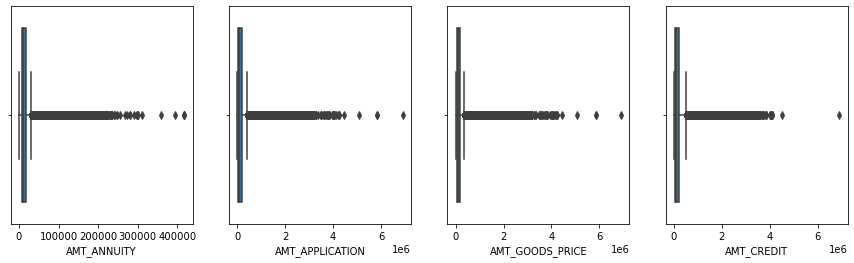

In [143]:
plt.figure(figsize = (15,4))

plt.subplot(1,4,1)
sns.boxplot(previous_data.AMT_ANNUITY)

plt.subplot(1,4,2)
sns.boxplot(previous_data.AMT_APPLICATION)

plt.subplot(1,4,3)
sns.boxplot(previous_data.AMT_GOODS_PRICE)

plt.subplot(1,4,4)
sns.boxplot(previous_data.AMT_CREDIT)
plt.show()

In [144]:
#Capping of outliers
#AMT_ANNUITY
Q3=previous_data.AMT_ANNUITY.quantile(0.75)
Q1=previous_data.AMT_ANNUITY.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

9276.930000000002 30739.421250000007 -6368.298750000004


In [145]:
previous_data.AMT_ANNUITY=np.where(previous_data.AMT_ANNUITY>upper_bound,upper_bound,previous_data.AMT_ANNUITY)

In [146]:
#AMT_APPLICATION
Q3=previous_data.AMT_APPLICATION.quantile(0.75)
Q1=previous_data.AMT_APPLICATION.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

161640.0 422820.0 -223740.0


In [147]:
previous_data.AMT_APPLICATION=np.where(previous_data.AMT_APPLICATION>upper_bound,upper_bound,previous_data.AMT_APPLICATION)

In [148]:
#AMT_GOODS_PRICE
Q3=previous_data.AMT_GOODS_PRICE.quantile(0.75)
Q1=previous_data.AMT_GOODS_PRICE.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

112905.0 349762.5 -101857.5


In [149]:
previous_data.AMT_GOODS_PRICE=np.where(previous_data.AMT_GOODS_PRICE>upper_bound,upper_bound,previous_data.AMT_GOODS_PRICE)

In [150]:
#AMT_CREDIT
Q3=previous_data.AMT_CREDIT.quantile(0.75)
Q1=previous_data.AMT_CREDIT.quantile(0.25)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
print (IQR,upper_bound,lower_bound)

192258.0 504805.5 -264226.5


In [151]:
previous_data.AMT_CREDIT=np.where(previous_data.AMT_CREDIT>upper_bound,upper_bound,previous_data.AMT_CREDIT)

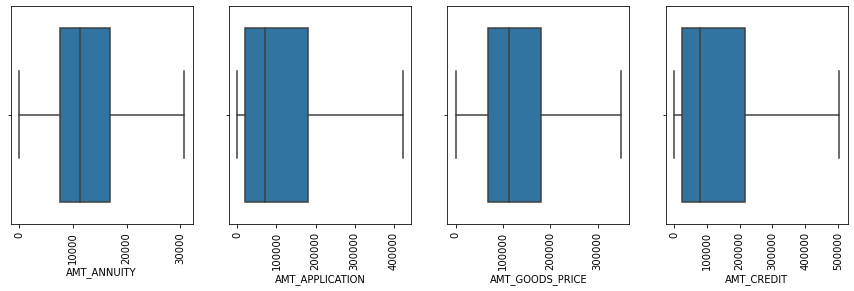

In [152]:
plt.figure(figsize = (15,4))

plt.subplot(1,4,1)
sns.boxplot(previous_data.AMT_ANNUITY)
plt.xticks(rotation = 90)

plt.subplot(1,4,2)
sns.boxplot(previous_data.AMT_APPLICATION)
plt.xticks(rotation = 90)

plt.subplot(1,4,3)
sns.boxplot(previous_data.AMT_GOODS_PRICE)
plt.xticks(rotation = 90)

plt.subplot(1,4,4)
sns.boxplot(previous_data.AMT_CREDIT)
plt.xticks(rotation = 90)
plt.show()

In [153]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.61500,422820.0,504805.5,349762.5,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.73500,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,30739.42125,422820.0,470790.0,349762.5,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,30739.42125,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
#checking the type of entries in categorical columns
previous_data.NAME_CONTRACT_TYPE.unique()

array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)

In [155]:
previous_data.NAME_CASH_LOAN_PURPOSE.unique()

array(['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs',
       'Building a house or an annex', 'Other', 'Journey',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Furniture', 'Buying a garage',
       'Business development', 'Wedding / gift / holiday', 'Hobby',
       'Gasification / water supply', 'Refusal to name the goal',
       'Money for a third person'], dtype=object)

In [156]:
previous_data.NAME_PAYMENT_TYPE.unique()

array(['Cash through the bank', 'XNA', 'Non-cash from your account',
       'Cashless from the account of the employer'], dtype=object)

In [157]:
previous_data.CODE_REJECT_REASON.unique()

array(['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'XNA', 'VERIF',
       'SYSTEM'], dtype=object)

In [158]:
previous_data.NAME_CLIENT_TYPE.unique()

array(['Repeater', 'New', 'Refreshed', 'XNA'], dtype=object)

In [159]:
previous_data.NAME_PORTFOLIO.unique()

array(['POS', 'Cash', 'XNA', 'Cards', 'Cars'], dtype=object)

In [160]:
previous_data.NAME_GOODS_CATEGORY.unique()

array(['Mobile', 'XNA', 'Consumer Electronics', 'Construction Materials',
       'Auto Accessories', 'Photo / Cinema Equipment', 'Computers',
       'Audio/Video', 'Medicine', 'Clothing and Accessories', 'Furniture',
       'Sport and Leisure', 'Homewares', 'Gardening', 'Jewelry',
       'Vehicles', 'Education', 'Medical Supplies', 'Other',
       'Direct Sales', 'Office Appliances', 'Fitness', 'Tourism',
       'Insurance', 'Additional Service', 'Weapon', 'Animals',
       'House Construction'], dtype=object)

In [161]:
previous_data.NAME_PRODUCT_TYPE.unique()

array(['XNA', 'x-sell', 'walk-in'], dtype=object)

In [162]:
previous_data.NAME_SELLER_INDUSTRY.unique()

array(['Connectivity', 'XNA', 'Consumer electronics', 'Industry',
       'Clothing', 'Furniture', 'Construction', 'Jewelry',
       'Auto technology', 'MLM partners', 'Tourism'], dtype=object)

In [163]:
previous_data.NAME_YIELD_GROUP.unique()

array(['middle', 'low_action', 'high', 'low_normal', 'XNA'], dtype=object)

All the above categorical columns have invalid entries like XNA or XAP. These entries can be imputed with the mode or a separate category can be created for the same.

In [164]:
previous_data.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

In [165]:
previous_data.CHANNEL_TYPE.unique()

array(['Country-wide', 'Contact center', 'Credit and cash offices',
       'Stone', 'Regional / Local', 'AP+ (Cash loan)',
       'Channel of corporate sales', 'Car dealer'], dtype=object)

In [166]:
previous_data.PRODUCT_COMBINATION.unique()

array(['POS mobile with interest', 'Cash X-Sell: low',
       'Cash X-Sell: high', 'Cash X-Sell: middle', 'Cash Street: high',
       'Cash', 'POS household without interest',
       'POS household with interest', 'POS other with interest',
       'Card X-Sell', 'POS mobile without interest', 'Card Street',
       'POS industry with interest', 'Cash Street: low',
       'POS industry without interest', 'Cash Street: middle',
       'POS others without interest', 'Unknown'], dtype=object)

### Analysis

The current data and previous data has a common column --> 'Current ID'. Let's merge these two data on this column and check  if we can get some good insights.

In [167]:
merged_data=current_data.merge(previous_data,on='SK_ID_CURR',how='left',suffixes=('_c','_p'))

In [168]:
merged_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_c,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_c,AMT_ANNUITY_c,AMT_GOODS_PRICE_c,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_AGE,CNT_YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_DAY,AGE_GROUP,INCOME_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_p,AMT_ANNUITY_p,AMT_APPLICATION,AMT_CREDIT_p,AMT_GOODS_PRICE_p,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,25.920548,1.745205,3648.0,2120,1,Laborers,1,0,0,0,Business Entity Type 3,0.262949,0.139376,1134.0,0.0,<30,Normal,1038818.0,Consumer loans,9251.77500,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,565.0,125.0,25.0,17.0,0.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,1186.0,291,1,Core staff,2,0,0,0,School,0.622246,NaN,828.0,0.0,40-50,High,1810518.0,Cash loans,30739.42125,422820.0,504805.5,349762.5,FRIDAY,12.0,Y,1.0,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,716.0,386.0,536.0,527.0,1.0
2,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,1186.0,291,1,Core staff,2,0,0,0,School,0.622246,NaN,828.0,0.0,40-50,High,2636178.0,Consumer loans,30739.42125,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,797.0,647.0,647.0,639.0,0.0
3,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,45.931507,3.254795,1186.0,291,1,Core staff,2,0,0,0,School,0.622246,NaN,828.0,0.0,40-50,High,2396755.0,Consumer loans,6737.31000,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,2310.0,1980.0,1980.0,1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,52.180822,0.616438,4260.0,2531,1,Laborers,1,0,0,0,Government,0.555912,0.729567,815.0,0.0,50-60,Very Low,1564014.0,Consumer loans,5357.25000,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,365243.0,784.0,694.0,724.0,714.0,0.0


<AxesSubplot:>

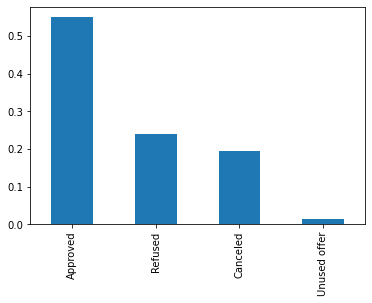

In [169]:
#current defaulters vs previous contract status
merged_data[merged_data.TARGET == 1].NAME_CONTRACT_STATUS.value_counts(normalize= True).plot.bar()

It can be seen that amongst the defaulters 25% of people's applications were rejected in their previous applications and almost 50% applications were approved.

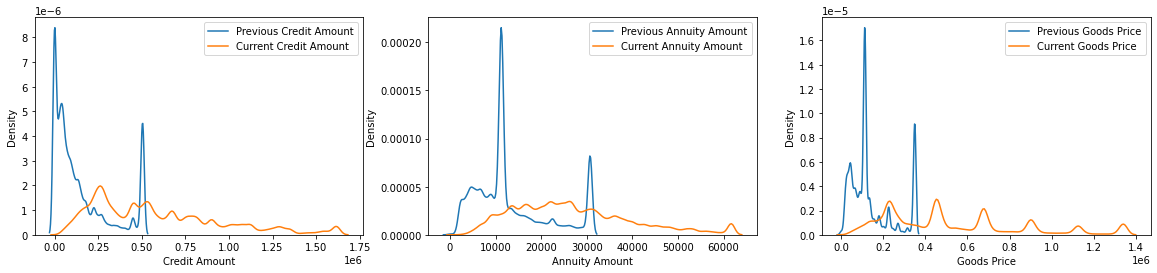

In [170]:
plt.figure(figsize = (20,4))

plt.subplot(1,3,1)

sns.distplot(merged_data.AMT_CREDIT_p, hist = False, label = 'Previous Credit Amount')
sns.distplot(merged_data.AMT_CREDIT_c, hist = False, label = 'Current Credit Amount')
plt.xlabel('Credit Amount')
plt.legend()

plt.subplot(1,3,2)
sns.distplot(merged_data.AMT_ANNUITY_p, hist = False, label = 'Previous Annuity Amount')
sns.distplot(merged_data.AMT_ANNUITY_c, hist = False, label = 'Current Annuity Amount')
plt.xlabel('Annuity Amount')
plt.legend()

plt.subplot(1,3,3)
sns.distplot(merged_data.AMT_GOODS_PRICE_p, hist = False, label = 'Previous Goods Price')
sns.distplot(merged_data.AMT_GOODS_PRICE_c, hist = False, label = 'Current Goods Price')
plt.xlabel('Goods Price')
plt.legend()

plt.show()

Insights from the graph:
<ol>
    <li>The previous applicants are maximum in the credit range of 1L-2L, but  a sudden downfall is seen for the credit range of 2L-4L with again a rise at 5L. The current applicants seems to follow a normal trend. </li>
    <li>An almost similar trend is seen in the price of goods graph for previous applications, but in new applications maximum people have purchased goods of around 3L, 5L, 7L, i.e. in odd amounts. </li>
    </ol>
All the graphs clearly depicts that the maximums of each variable in previous applications are less than the maximums of each variable in the current applications.   

In [ ]:
pip install jovian

In [ ]:
import jovian

In [ ]:
jovian.commit()